In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as web
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
%matplotlib inline
df = web.DataReader('TATAMOTORS.NS', data_source='yahoo',start=datetime.now()-timedelta(days=3*365),end=datetime.now()).reset_index()
df1  = web.DataReader('^NSEI',data_source='yahoo',start=datetime.now()-timedelta(days=3*365),end=datetime.now()).reset_index()
df['Nifty_Index'] = df1['Open']
#df.isnull().sum()
df.fillna(method ='ffill' , inplace= True)
df['Date'] = pd.to_datetime(df.Date)
y = df.filter(["Open",'Nifty_Index'])[1:].reset_index()
x = df.drop(["Open",'Nifty_Index'],axis = 1)[:-1]
New_data = {}
New_data.update(x.filter(["Close","Volume"]))
New_data.update(y.filter(['Nifty_Index',"Open"]))
data = pd.DataFrame(New_data)
Q1 = data['Volume'].quantile(.30)
Q3 = data['Volume'].quantile(.70)
IQR = Q3-Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
data1 = data[(data['Volume']>lower_limit) & (data['Volume']<upper_limit)]
q3 = data1['Nifty_Index'].quantile(.75)
q1 = data1['Nifty_Index'].quantile(.30)
iqr = q3-q1
Data_model_use = data1[(data1['Nifty_Index']>lower_limit) & (data1['Nifty_Index']<upper_limit)]
Y = Data_model_use['Open']
X = Data_model_use.drop(['Open'],axis = 1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
classifier = LinearRegression()
classifier.fit(X_train,Y_train)

pickle.dump(classifier,open('model.pk1', 'wb'))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as web
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pickle
%matplotlib inline

**Data acquisition**

*   Collected data from the source https://in.finance.yahoo.com

*   Used pandas to collect the data from the web.




In [ ]:
df = web.DataReader('TATAMOTORS.NS', data_source='yahoo',start=datetime.now()-timedelta(days=3*365),end=datetime.now())
df


In [ ]:
df1  = web.DataReader('^NSEI',data_source='yahoo',start=datetime.now()-timedelta(days=3*365),end=datetime.now())
df['Nifty_Index'] = df1['Open']
df.reset_index()


In [ ]:
df.to_csv('Tata.csv',index=True)
data = pd.read_csv('Tata.csv')
data

**Data Exploration**

1.   Used Pandas to filter the data as per the requirements
2.   eliminated the null values




In [6]:
'''df['Date'] = pd.to_datetime(df.Date)
df = df.sort_values(by='date',ascending=True)
df'''

"df['Date'] = pd.to_datetime(df.Date)\ndf = df.sort_values(by='date',ascending=True)\ndf"

In [7]:
data.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Nifty_Index'],
      dtype='object')

In [8]:
data.isnull().sum()


Date           0
High           0
Low            0
Open           0
Close          0
Volume         0
Adj Close      0
Nifty_Index    2
dtype: int64

In [9]:
data[data['Nifty_Index'].isnull()]


,Date,High,Low,Open,Close,Volume,Adj Close,Nifty_Index
139,2019-01-01,174.199997,171.300003,173.500000,173.449997,6715543.0,173.449997,NaN
631,2021-01-01,187.000000,184.500000,184.949997,186.500000,27334421.0,186.500000,NaN


In [10]:
data.fillna(method ='ffill' , inplace= True)


In [11]:
data.isnull().sum()

Date           0
High           0
Low            0
Open           0
Close          0
Volume         0
Adj Close      0
Nifty_Index    0
dtype: int64

In [ ]:
data['Date'] = pd.to_datetime(data.Date)
data

In [13]:
y = data.filter(["Open",'Nifty_Index'])[1:].reset_index()
x = data.drop(["Open",'Nifty_Index'],axis = 1)[:-1]


In [14]:
x.shape,y.shape

((734, 6), (734, 3))

In [ ]:
New_data = {}
New_data.update(x.filter(['Date',"Close","Volume"]))
New_data.update(y.filter(['Nifty_Index',"Open"]))
df3 = pd.DataFrame(New_data)
df3

In [ ]:
df2 = df3.filter(["Open","Close","Volume","Nifty_Index"])
df2.corr()


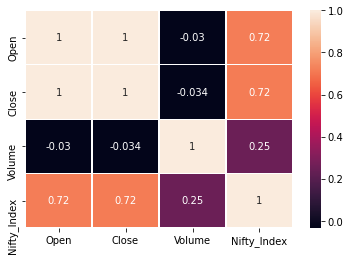

In [17]:
sns.heatmap(df2.corr(),annot=True,linewidths=0.2)

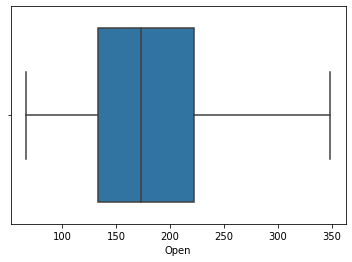

In [18]:
sns.boxplot(df2['Open'])
plt.show()

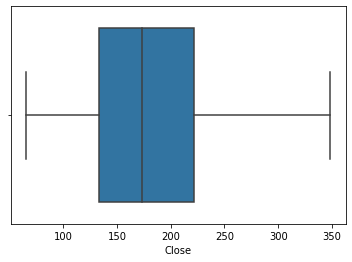

In [19]:
sns.boxplot(df2['Close'])
plt.show()


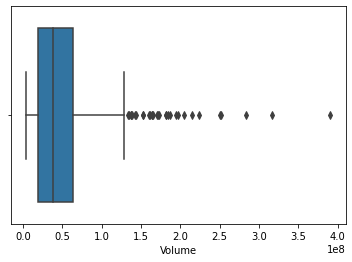

In [20]:
sns.boxplot(df2['Volume'])
plt.show()

In [21]:
Q1 = df2['Volume'].quantile(.30)
Q3 = df2['Volume'].quantile(.70)
IQR = Q3-Q1
IQR,Q3,Q1

(35549447.900000006, 56949278.7, 21399830.8)

In [22]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
df3 = df3[(df3['Volume']>lower_limit) & (df3['Volume']<upper_limit)]

In [23]:

df3

,Date,Close,Volume,Nifty_Index,Open
0,2018-06-07,305.399994,22839023.0,10736.400391,305.700012
1,2018-06-08,309.950012,27249374.0,10781.849609,310.899994
2,2018-06-11,309.750000,14650133.0,10816.150391,310.950012
3,2018-06-12,307.799988,7932388.0,10887.500000,309.200012
4,2018-06-13,308.399994,7280886.0,10832.900391,308.500000
...,...,...,...,...,...
729,2021-05-28,318.750000,26618815.0,15437.750000,318.700012
730,2021-05-31,318.750000,30917309.0,15629.650391,319.200012
731,2021-06-01,318.100006,32595728.0,15520.349609,315.950012
732,2021-06-02,323.000000,26323777.0,15655.549805,325.299988


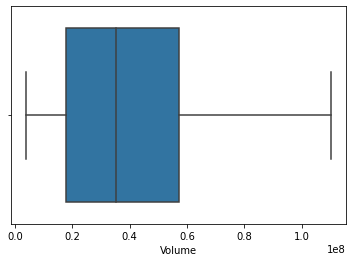

In [24]:
sns.boxplot(df3['Volume'])
plt.show()

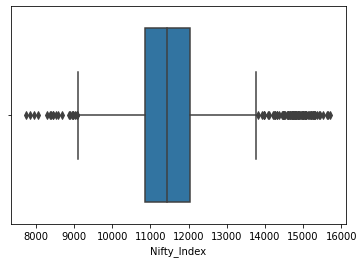

In [25]:
sns.boxplot(df3['Nifty_Index'])
plt.show()

In [26]:
df3['Nifty_Index'].describe()

count      688.000000
mean     11672.532426
std       1482.204633
min       7735.149902
25%      10851.237305
50%      11440.325195
75%      12026.862793
max      15712.500000
Name: Nifty_Index, dtype: float64

In [27]:
q3 = df3['Nifty_Index'].quantile(.75)
q1 = df3['Nifty_Index'].quantile(.30)
iqr = q3-q1
q3

12026.86279296875

In [28]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
upper_limit,lower_limit

(13670.806396484375, 9286.956787109375)

In [ ]:
df4 = df3[(df3['Nifty_Index']>lower_limit) & (df3['Nifty_Index']<upper_limit)]
df4

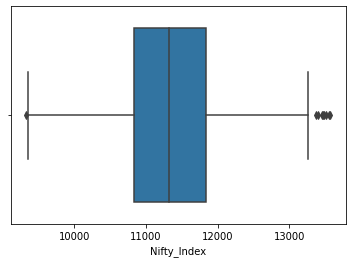

In [ ]:
sns.boxplot(df4['Nifty_Index'])
plt.show()

**bold text**

In [39]:
Y = df4['Open']
X = df4.drop(['Open','Date'],axis = 1)
X.shape,Y.shape

((565, 3), (565,))

In [ ]:
X


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)




(452, 3) (113, 3) (452,) (113,)


In [42]:
print(type(Y_train))

<class 'pandas.core.series.Series'>


In [43]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred = classifier.predict(X_test)
dat = {'actual':Y_test,'pred':y_pred}
dd = pd.DataFrame(dat)
dd

,actual,pred
243,170.899994,170.335354
515,106.349998,107.019901
128,167.250000,167.544739
158,172.350006,172.832888
417,154.000000,159.025077
...,...,...
314,135.000000,133.432550
602,170.050003,168.115515
537,127.000000,126.056369
173,164.449997,164.263428


In [48]:
from sklearn import metrics
print('mean absolute error', metrics.mean_absolute_error(y_pred,Y_test))
print('mean squared error', metrics.mean_squared_error(y_pred,Y_test))
print('root mean squared error', np.sqrt(metrics.mean_squared_error(y_pred,Y_test)))


mean absolute error 1.3219090384031518
mean squared error 5.764856853374054
root mean squared error 2.401011631245058


In [ ]:
classifier.score(X_train,Y_train)

0.9987979950656335

In [ ]:
classifier.score(X_test,Y_test)

0.9985201615871426

In [49]:
input1 = (291.5,29350536,14668.34961)
input = (301.25,45032502,14816.84961)
input_array = np.asarray(input1).reshape(1,-1)
input1

(291.5, 29350536, 14668.34961)

In [ ]:
print(type(input_array[0][1]))

<class 'numpy.float64'>


In [ ]:
pred = classifier.predict(input_array)
print(pred)


[292.16105838]
